In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import csv

In [11]:
# df = pd.read_csv('../ppmi/cd-pd/mri-cd-pd-pro_5_10_2019.csv')
df = pd.read_csv('../ppmi/cd-pd/new-test-2_5_10_2019.csv')

In [12]:
df.head(20)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,436444,60036,Prodromal,F,71,0,MRI,Axial PD-T2 TSE FS,Original,3/04/2014,DCM,NaN
1,476498,60074,Prodromal,M,74,0,MRI,T2 in T1-anatomical space,Processed,9/30/2014,NiFTI,NaN
2,362497,3837,PD,M,64,0,MRI,Axial PD-T2 TSE,Original,2/26/2013,DCM,NaN
3,406544,3817,Control,M,75,0,MRI,T2 in T1-anatomical space,Processed,1/15/2013,NiFTI,NaN
4,440308,60043,Prodromal,M,68,0,MRI,Axial PD-T2 TSE FS,Original,6/10/2014,DCM,NaN
5,436445,60036,Prodromal,F,71,0,MRI,Axial PD-T2 TSE FS,Original,3/04/2014,DCM,NaN
6,449727,60074,Prodromal,M,74,0,MRI,Axial PD-T2 TSE FS,Original,9/30/2014,DCM,NaN
7,410729,3837,PD,M,64,0,MRI,T2 in T1-anatomical space,Processed,2/26/2013,NiFTI,NaN
8,362498,3837,PD,M,64,0,MRI,MPRAGE GRAPPA,Original,2/26/2013,DCM,NaN
9,440310,60044,Prodromal,M,73,0,MRI,Axial PD-T2 TSE FS,Original,4/29/2014,DCM,NaN


In [13]:
pd_df = df[df['Group'] == 'PD']
pd_df.head(10)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
2,362497,3837,PD,M,64,0,MRI,Axial PD-T2 TSE,Original,2/26/2013,DCM,NaN
7,410729,3837,PD,M,64,0,MRI,T2 in T1-anatomical space,Processed,2/26/2013,NiFTI,NaN
8,362498,3837,PD,M,64,0,MRI,MPRAGE GRAPPA,Original,2/26/2013,DCM,NaN
12,362500,3837,PD,M,64,0,MRI,Axial PD-T2 TSE,Original,2/26/2013,DCM,NaN
18,410737,3833,PD,F,74,0,MRI,T2 in T1-anatomical space,Processed,11/27/2012,NiFTI,NaN
23,410984,3833,PD,F,74,0,MRI,T1-anatomical,Processed,11/27/2012,NiFTI,NaN
28,410890,3833,PD,F,74,0,MRI,T2 in corrected EPI space for I362491,Processed,11/27/2012,NiFTI,5/07/2019
33,410786,3837,PD,M,64,0,MRI,T2 in corrected EPI space for I362496,Processed,2/26/2013,NiFTI,5/07/2019
36,362493,3833,PD,F,74,0,MRI,Axial PD-T2 TSE,Original,11/27/2012,DCM,NaN
45,362494,3833,PD,F,74,0,MRI,Axial PD-T2 TSE,Original,11/27/2012,DCM,NaN


In [14]:
len(set(pd_df['Subject']))

410

In [6]:
def patients_hist(group):
    group_df = df[df['Group'] == group]
    group_df.head(10)


    ids = set(group_df['Subject'])
    dates = []
    for i in ids:
        group_df_id = group_df[group_df['Subject'] == i]
        dates.append(len(set(group_df_id['Acq Date'])))

    # fixed bin size
    plt.xlim([0, 5])

    plt.hist(dates, bins=7, alpha=0.5)
    plt.title('Timepoints available for %s patients'%(group))
    plt.xlabel('number of timepoints')
    plt.ylabel('number of patients')

    plt.show()

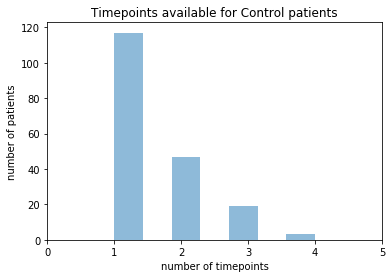

In [7]:
patients_hist('Control')

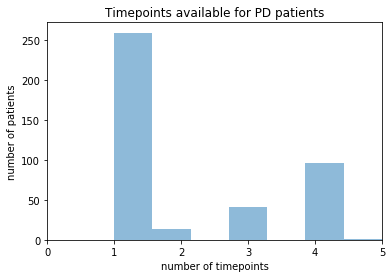

In [8]:
patients_hist('PD')

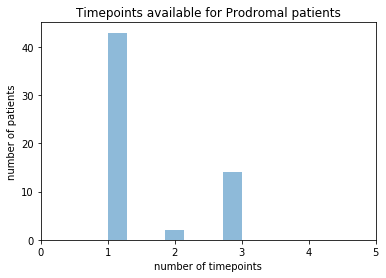

In [9]:
patients_hist('Prodromal')

In [10]:
set(df['Visit'])

{0, 1, 5, 7, 9, 11, 21, 30, 90}

In [11]:
ida_df = pd.read_csv('../ppmi/cd-pd/idaSearch_5_10_2019.csv')

In [12]:
ida_df.head(10)

,Subject ID,Sex,Age,Description
0,15761,F,69.6,T1-anatomical <- SAG MPRAGE GRAPPA
1,15761,F,69.6,T2 in T1-anatomical space <- SAG MPRAGE GRAPPA
2,15761,F,69.6,T2 in corrected EPI space for I449529 <- Axial...
3,17608,M,60.8,T2 in corrected EPI space for I473072 <- Axial...
4,17608,M,60.8,T1-anatomical <- SAG MPRAGE GRAPPA
5,17608,M,60.8,T2 in T1-anatomical space <- SAG MPRAGE GRAPPA
6,3102,M,63.7,T2 in T1-anatomical space <- MPRAGE GRAPPA
7,3102,M,63.7,T1-anatomical <- MPRAGE GRAPPA
8,3102,M,63.7,T2 in corrected EPI space for I226368 <- Axial...
9,3102,M,63.7,T2 in corrected EPI space for I226369 <- Axial...


In [13]:
ages = df['Age']

In [14]:
pd_df = df[df['Group']=='PD']
c_df = df[df['Group']=='Control']
pro_df = df[df['Group']=='Prodromal']

pd_f = len(set(pd_df[pd_df['Sex'] == 'F']['Subject']))
pd_m = len(set(pd_df[pd_df['Sex'] == 'M']['Subject']))
c_f = len(set(c_df[c_df['Sex'] == 'F']['Subject']))
c_m = len(set(c_df[c_df['Sex'] == 'M']['Subject']))
pro_f = len(set(pro_df[pro_df['Sex'] == 'F']['Subject']))
pro_m = len(set(pro_df[pro_df['Sex'] == 'M']['Subject']))

print('DATASET STATS')
print('AGE | Min: %d, Max: %d, Average; %d'%(min(ages), max(ages), sum(ages)/len(ages)))
print('GROUP | PD: %d, Control: %d, Prodromal: %d'%
      (len(set(pd_df['Subject'])), len(set(c_df['Subject'])), len(set(pro_df['Subject']))))
print('GENDER F | PD: %d, Contol: %d, Prodromdal: %d' %(pd_f, c_f, pro_f))
print('GENDER M | PD: %d, Contol: %d, Prodromdal: %d' %(pd_m, c_m, pro_m))

DATASET STATS
AGE | Min: 31, Max: 86, Average; 62
GROUP | PD: 410, Control: 186, Prodromal: 59
GENDER F | PD: 144, Contol: 68, Prodromdal: 16
GENDER M | PD: 266, Contol: 118, Prodromdal: 43


In [15]:
len(os.listdir('../ppmi/cd-pd/PPMI'))

655

In [16]:
len(set(df['Subject']))

655

In [17]:
A = set(os.listdir('../ppmi/cd-pd/PPMI'))
B = set(df['Subject'])
C = A.intersection(B)

In [18]:
mri_df = pd.read_csv('../ppmi/cd-pd/Magnetic_Resonance_Imaging.csv')

In [19]:
mri_df.head(10)

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,MRICMPLT,MRIDT,MRIWDTI,MRIWRSS,...,PDMEDYN,ONLDOPA,ONDOPAG,ONOTHER,PDMEDDT,COMM,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,234501601,V,3400,BL,MRI,07/2010,1.0,07/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,Partially empty sella and question of flatteni...,07/2010,2010-07-22 11:19:05.0,NaN,07/2010
1,235626601,V,3403,BL,MRI,07/2010,1.0,07/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,07/2010,2010-07-28 11:43:54.0,NaN,07/2010
2,235629101,V,3401,BL,MRI,07/2010,1.0,07/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,07/2010,2010-07-28 11:53:19.0,NaN,07/2010
3,236050101,V,3404,BL,MRI,07/2010,1.0,07/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,07/2010,2010-07-30 07:21:38.0,NaN,07/2010
4,237393201,V,3405,BL,MRI,07/2010,1.0,07/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,08/2010,2010-08-09 12:00:47.0,NaN,08/2010
5,242082901,V,3406,BL,MRI,08/2010,1.0,08/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,"Due to subject's schedule, MRI was 3 days out ...",09/2010,2010-09-02 12:16:06.0,NaN,09/2010
6,247263901,V,3407,BL,MRI,09/2010,1.0,09/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,09/2010,2010-10-05 12:05:43.0,NaN,10/2010
7,250122401,V,3409,BL,MRI,10/2010,1.0,10/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10/2010,2010-10-15 10:36:18.0,NaN,10/2010
8,252723201,V,3051,BL,MRI,10/2010,1.0,10/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10/2010,2011-05-19 08:53:08.0,NaN,11/2010
9,253255901,V,3410,BL,MRI,10/2010,1.0,10/2010,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10/2010,2010-10-29 12:37:40.0,NaN,10/2010


In [20]:
ids = set(mri_df['PATNO'])

In [21]:
list(mri_df)

['REC_ID',
 'F_STATUS',
 'PATNO',
 'EVENT_ID',
 'PAG_NAME',
 'INFODT',
 'MRICMPLT',
 'MRIDT',
 'MRIWDTI',
 'MRIWRSS',
 'MRIXFRYN',
 'MRIRSLT',
 'PDMEDYN',
 'ONLDOPA',
 'ONDOPAG',
 'ONOTHER',
 'PDMEDDT',
 'COMM',
 'ORIG_ENTRY',
 'LAST_UPDATE',
 'QUERY',
 'SITE_APRV']

In [22]:
df[df['Subject']==3000]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
221,224561,3000,Control,F,69,1,MRI,AX T2 FLAIR,Original,2/01/2011,DCM,NaN
494,224562,3000,Control,F,69,1,MRI,sag 3D FSPGR BRAVO straight,Original,2/01/2011,DCM,NaN


In [23]:
pd_df.loc[pd_df['Subject'] == 3000]['Description']

Series([], Name: Description, dtype: object)

In [24]:
in_txt = csv.reader(open('../ppmi/cd-pd/mri_progression.txt', 'r'), delimiter = '\t')

In [25]:
out_csv = csv.writer(open('../ppmi/cd-pd/mri_progression2.csv', 'w'))
out_csv.writerows(in_txt)

In [26]:
list(csv.reader(open('../ppmi/cd-pd/mri_progression.txt', 'rt'), delimiter = '\t'))

[['',
  'Image Data ID',
  'Subject',
  'Group',
  'Sex',
  'Age',
  'Visit',
  'Modality',
  'Description',
  'Type',
  'Acq Date',
  'Format',
  'Downloaded',
  'Progression',
  'Stage'],
 ['3',
  '406544',
  '3817',
  'Control',
  'M',
  '75',
  '0',
  'MRI',
  'T2 in T1-anatomical space',
  'Processed',
  '1/15/2013',
  'NiFTI',
  '',
  '0',
  '0'],
 ['10',
  '410941',
  '3816',
  'Control',
  'M',
  '66',
  '0',
  'MRI',
  'T2 in T1-anatomical space',
  'Processed',
  '12/04/2012',
  'NiFTI',
  '',
  '0',
  '0'],
 ['19',
  '410982',
  '3816',
  'Control',
  'M',
  '66',
  '0',
  'MRI',
  'T1-anatomical',
  'Processed',
  '12/04/2012',
  'NiFTI',
  '',
  '0',
  '0'],
 ['26',
  '344402',
  '3813',
  'Control',
  'M',
  '66',
  '0',
  'MRI',
  'Axial PD-T2 TSE',
  'Original',
  '10/16/2012',
  'DCM',
  '',
  '0',
  '0'],
 ['27',
  '410769',
  '3816',
  'Control',
  'M',
  '66',
  '0',
  'MRI',
  'T2 in corrected EPI space for I357776',
  'Processed',
  '12/04/2012',
  'NiFTI',
  '5/0

In [27]:
mri_df = pd.read_csv('../ppmi/cd-pd/mri_progression2.csv')
mri_df.head(10)

,Unnamed: 0,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Progression,Stage
0,3,406544,3817,Control,M,75,0,MRI,T2 in T1-anatomical space,Processed,1/15/2013,NiFTI,NaN,0,0
1,10,410941,3816,Control,M,66,0,MRI,T2 in T1-anatomical space,Processed,12/04/2012,NiFTI,NaN,0,0
2,19,410982,3816,Control,M,66,0,MRI,T1-anatomical,Processed,12/04/2012,NiFTI,NaN,0,0
3,26,344402,3813,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,10/16/2012,DCM,NaN,0,0
4,27,410769,3816,Control,M,66,0,MRI,T2 in corrected EPI space for I357776,Processed,12/04/2012,NiFTI,5/07/2019,0,0
5,29,410987,3817,Control,M,75,0,MRI,T1-anatomical,Processed,1/15/2013,NiFTI,NaN,0,0
6,31,344403,3813,Control,M,66,0,MRI,MPRAGE GRAPPA,Original,10/16/2012,DCM,NaN,0,0
7,32,357775,3816,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,12/04/2012,DCM,NaN,0,0
8,35,362628,3817,Control,M,75,0,MRI,Axial PD-T2 TSE,Original,1/15/2013,DCM,NaN,0,0
9,38,344405,3813,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,10/16/2012,DCM,NaN,0,0


In [28]:
mri_df['Progression'].value_counts()

0    3678
1     785
Name: Progression, dtype: int64

In [29]:
mri_df['Stage'].value_counts()

2    1712
1    1426
0    1310
3      15
Name: Stage, dtype: int64

Get File Paths

In [30]:
A = set(mri_df['Subject'])
B = set(df['Subject'])
len(A & B)

509

In [31]:
stage0 = mri_df[mri_df['Stage'] == 0]
stage1 = mri_df[mri_df['Stage'] == 1]
stage2 = mri_df[mri_df['Stage'] == 2]
stage3 = mri_df[mri_df['Stage'] == 3]

In [32]:
stage0.head(10)

,Unnamed: 0,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Progression,Stage
0,3,406544,3817,Control,M,75,0,MRI,T2 in T1-anatomical space,Processed,1/15/2013,NiFTI,NaN,0,0
1,10,410941,3816,Control,M,66,0,MRI,T2 in T1-anatomical space,Processed,12/04/2012,NiFTI,NaN,0,0
2,19,410982,3816,Control,M,66,0,MRI,T1-anatomical,Processed,12/04/2012,NiFTI,NaN,0,0
3,26,344402,3813,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,10/16/2012,DCM,NaN,0,0
4,27,410769,3816,Control,M,66,0,MRI,T2 in corrected EPI space for I357776,Processed,12/04/2012,NiFTI,5/07/2019,0,0
5,29,410987,3817,Control,M,75,0,MRI,T1-anatomical,Processed,1/15/2013,NiFTI,NaN,0,0
6,31,344403,3813,Control,M,66,0,MRI,MPRAGE GRAPPA,Original,10/16/2012,DCM,NaN,0,0
7,32,357775,3816,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,12/04/2012,DCM,NaN,0,0
8,35,362628,3817,Control,M,75,0,MRI,Axial PD-T2 TSE,Original,1/15/2013,DCM,NaN,0,0
9,38,344405,3813,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,10/16/2012,DCM,NaN,0,0


In [33]:
def make_dict(df):
    dcm_dict = {}
    ids = set(df['Subject'])
#     for i in ids:
    PathDicom = "../ppmi/cd-pd/"
#     print(PathDicom)
    for dirName, subdirList, fileList in os.walk(PathDicom):
        files = []
#         print(dirName, subdirList, fileList)
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                files.append(os.path.join(dirName,filename))
        if len(files) > 0:
            dcm_dict[dirName] = files
                
    return dcm_dict

In [34]:
d = make_dict(stage3)

In [35]:
set(stage3['Subject'])

{3059, 3080, 3607, 3612}

In [36]:
def make_stage_dict(df, d):
    dcm_dict = {}
    ids = set(df['Subject'])
    keys = list(d)
    for i in ids:
        id_list = {}
        for k in keys:
            if str(i) in k and 'T2' in k:
                id_list[k] = d[k]
        dcm_dict[i] = id_list
    
    return dcm_dict

In [37]:
s0 = make_stage_dict(stage0, d)
s1 = make_stage_dict(stage1, d)
s2 = make_stage_dict(stage2, d)
s3 = make_stage_dict(stage3, d)

In [38]:
print('STAGED PATIENT INFO')
print('STAGES | stage 1: %d, stage 2: %d, stage 3: %d, stage 4: %d' % 
      (len(set(stage0['Subject'])), len(set(stage1['Subject'])), len(set(stage2['Subject'])), len(set(stage3['Subject']))))


STAGED PATIENT INFO
STAGES | stage 1: 175, stage 2: 152, stage 3: 178, stage 4: 4


In [39]:
s3[3059].keys()

dict_keys([])

In [40]:
in_txt = csv.reader(open('../ppmi/cd-pd/mri_t2_progression.txt', 'r'), delimiter = '\t')
out_csv = csv.writer(open('../ppmi/cd-pd/mri_t2_progression2.csv', 'w'))
out_csv.writerows(in_txt)

In [41]:
mri_df = pd.read_csv('../ppmi/cd-pd/mri_t2_progression2.csv')
mri_df.head(20)

,Unnamed: 0,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Progression,Stage
0,3,406544,3817,Control,M,75,0,MRI,T2 in T1-anatomical space,Processed,1/15/2013,NiFTI,NaN,0,0
1,10,410941,3816,Control,M,66,0,MRI,T2 in T1-anatomical space,Processed,12/04/2012,NiFTI,NaN,0,0
2,26,344402,3813,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,10/16/2012,DCM,NaN,0,0
3,27,410769,3816,Control,M,66,0,MRI,T2 in corrected EPI space for I357776,Processed,12/04/2012,NiFTI,5/07/2019,0,0
4,32,357775,3816,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,12/04/2012,DCM,NaN,0,0
5,35,362628,3817,Control,M,75,0,MRI,Axial PD-T2 TSE,Original,1/15/2013,DCM,NaN,0,0
6,38,344405,3813,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,10/16/2012,DCM,NaN,0,0
7,39,357777,3816,Control,M,66,0,MRI,Axial PD-T2 TSE,Original,12/04/2012,DCM,NaN,0,0
8,40,410536,3813,Control,M,66,0,MRI,T2 in corrected EPI space for I344404,Processed,10/16/2012,NiFTI,NaN,0,0
9,44,370983,3813,Control,M,66,0,MRI,T2 in T1-anatomical space,Processed,10/16/2012,NiFTI,NaN,0,0


In [42]:
len(set(mri_df['Subject']))

419

In [43]:
stage0 = mri_df[mri_df['Stage'] == 0]
stage1 = mri_df[mri_df['Stage'] == 1]
stage2 = mri_df[mri_df['Stage'] == 2]
stage3 = mri_df[mri_df['Stage'] == 3]

In [44]:
d = make_dict(stage3)

In [45]:
s0 = make_stage_dict(stage0, d)
s1 = make_stage_dict(stage1, d)
s2 = make_stage_dict(stage2, d)
s3 = make_stage_dict(stage3, d)

In [46]:
print('STAGED PATIENT INFO')
print('STAGES | stage 0: %d, stage 1: %d, stage 2: %d, stage 3: %d' % 
      (len(set(stage0['Subject'])), len(set(stage1['Subject'])), len(set(stage2['Subject'])), len(set(stage3['Subject']))))


STAGED PATIENT INFO
STAGES | stage 0: 148, stage 1: 122, stage 2: 147, stage 3: 2


In [47]:
stage0[stage0['Subject'] == 3104]

,Unnamed: 0,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Progression,Stage
56,172,291409,3104,Control,M,72,1,MRI,T2 in corrected EPI space for I226396,Processed,2/14/2011,NiFTI,5/07/2019,0,0
201,538,226397,3104,Control,M,72,1,MRI,Axial PD-T2 TSE,Original,2/14/2011,DCM,NaN,0,0
434,1084,226399,3104,Control,M,72,1,MRI,Axial PD-T2 TSE,Original,2/14/2011,DCM,NaN,0,0
792,1915,330119,3104,Control,M,72,1,MRI,T2 in T1-anatomical space,Processed,2/14/2011,NiFTI,NaN,0,0
949,2275,291393,3104,Control,M,72,1,MRI,T2 in corrected EPI space for I226395,Processed,2/14/2011,NiFTI,NaN,0,0
1308,3096,301553,3104,Control,M,73,5,MRI,Axial PD-T2 TSE,Original,4/20/2012,DCM,NaN,0,0
1377,3218,301554,3104,Control,M,73,5,MRI,Axial PD-T2 TSE,Original,4/20/2012,DCM,NaN,0,0
1685,3784,303484,3104,Control,M,73,5,MRI,T2 in corrected EPI space for I301551,Processed,4/20/2012,NiFTI,NaN,0,0
1743,3912,303495,3104,Control,M,73,5,MRI,T2 in corrected EPI space for I301555,Processed,4/20/2012,NiFTI,5/07/2019,0,0
1821,4047,330131,3104,Control,M,73,5,MRI,T2 in T1-anatomical space,Processed,4/20/2012,NiFTI,NaN,0,0


In [48]:
dcm_stage0 = stage0[stage0['Format'] == 'DCM']
dcm_stage0['Description'].value_counts()

Axial PD-T2 TSE                  228
Axial PD-T2 TSE FS                80
sT2W/PD_TSE                       26
AX PD + T2                        24
Ax PD /T2                         18
AX T2 DE                          14
AX T2 FLAIR                       11
Ax T2 FLAIR                       10
Axial PD-T2 TSE_AC/PC line        10
AX T2                              8
PD-T2 DUAL AXIAL TSE               8
AX FLAIR T2                        7
*AX FSE T2                         6
Ax T2 FSE                          6
AX T2 FLAIR 5/1                    5
AXIAL  T2  FSE                     5
AX T2 AC-PC line Entire Brain      5
Axial PD-T2-FS TSE                 4
AX T2 FSE                          1
Ax T2 Fse thin ac-pc               1
Name: Description, dtype: int64

In [49]:
mri_df[mri_df['Subject'] == 3102]

,Unnamed: 0,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Progression,Stage
99,265,226367,3102,PD,M,64,1,MRI,Axial PD-T2 TSE,Original,11/23/2010,DCM,NaN,1,1
171,467,333353,3102,PD,M,64,1,MRI,T2 in T1-anatomical space,Processed,11/23/2010,NiFTI,NaN,1,1
1065,2553,291370,3102,PD,M,64,1,MRI,T2 in corrected EPI space for I226368,Processed,11/23/2010,NiFTI,5/04/2019,1,1
1187,2825,291382,3102,PD,M,64,1,MRI,T2 in corrected EPI space for I226369,Processed,11/23/2010,NiFTI,5/04/2019,1,1
1233,2913,226366,3102,PD,M,64,1,MRI,Axial PD-T2 TSE,Original,11/23/2010,DCM,NaN,1,1
2057,4519,406744,3102,PD,M,66,7,MRI,T2 in corrected EPI space for I378208,Processed,2/06/2013,NiFTI,NaN,1,1
2166,4755,406759,3102,PD,M,66,7,MRI,T2 in T1-anatomical space,Processed,2/06/2013,NiFTI,NaN,1,1
2278,5015,378207,3102,PD,M,66,7,MRI,Axial PD-T2 TSE FS,Original,2/06/2013,DCM,NaN,1,1
2322,5110,378210,3102,PD,M,66,7,MRI,Axial PD-T2 TSE FS,Original,2/06/2013,DCM,NaN,1,1
